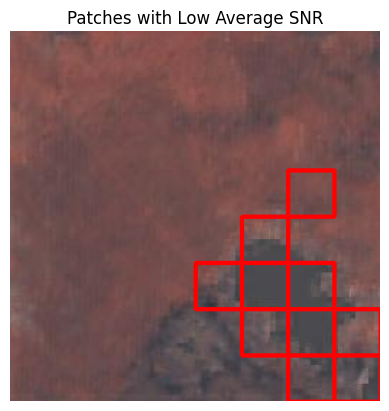

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
image_path = '/content/image_1 (1).jpg'  # Replace with your image path
color_image = cv2.imread(image_path)  # Load in BGR format
rgb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Patch size
patch_size = 32

# Function to split the image into patches and track positions
def split_into_patches(image, patch_size):
    patches = []
    patch_positions = []  # Store the top-left corner of each patch
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i + patch_size, j:j + patch_size]
            patches.append(patch)
            patch_positions.append((i, j))  # Store the top-left corner of each patch
    return patches, patch_positions

# Function to calculate the average SNR across the RGB channels for a patch
def calculate_average_snr(patch):
    snr_values = []

    # Calculate SNR for each RGB channel
    for idx in range(3):  # RGB has three channels
        channel_data = patch[:, :, idx]  # Extract the channel data
        mean_intensity = np.mean(channel_data)
        std_dev = np.std(channel_data)

        if std_dev == 0:  # Avoid division by zero
            snr = float('inf')  # Infinite SNR means no noise
        else:
            snr = mean_intensity / std_dev

        snr_values.append(snr)  # Collect SNR for each channel

    # Calculate the average SNR across all channels
    average_snr = np.mean(snr_values)
    return average_snr

# Split the image into patches
patches, patch_positions = split_into_patches(rgb_image, patch_size)

# Calculate the average SNR for each patch
average_snr_values = [calculate_average_snr(patch) for patch in patches]

# Find patches with average SNR lower than a specified threshold
snr_threshold = 10  # Adjust as needed
low_snr_patches = [
    (patch, position, snr) for patch, position, snr in zip(patches, patch_positions, average_snr_values)
    if snr < snr_threshold
]

# Create a copy of the original image to draw on
image_with_rectangles = rgb_image.copy()  # Copy the original RGB image for drawing

# Draw rectangles around patches with low average SNR
for patch, position, snr in low_snr_patches:
    top_left = position
    bottom_right = (top_left[0] + patch_size, top_left[1] + patch_size)
    cv2.rectangle(image_with_rectangles, top_left, bottom_right, (255, 0, 0), 2)  # Red rectangle

# Display the image with rectangles around low-SNR patches
plt.imshow(image_with_rectangles)
plt.title("Patches with Low Average SNR")
plt.axis('off')  # Hide axis ticks for clarity
plt.show()



##

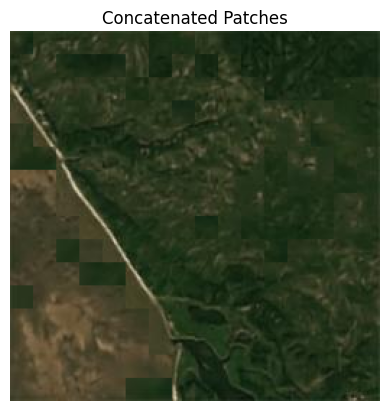

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the imag
image_paths = ['/content/drive/MyDrive/AE/DiffPreds/T2/T09WWP_R071_20.jpg', '/content/drive/MyDrive/AE/DiffPreds/T1/T09WWP_R071_20.jpg', '/content/drive/MyDrive/AE/DiffPreds/T0/T09WWP_R071_20.jpg']  # Adjust paths
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]

# Define the patch size
patch_size = 16

# Function to split an image into patches
def split_into_patches(image, patch_size):
    patches = []
    patch_positions = []  # Store the top-left corner of each patch
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i + patch_size, j:j + patch_size]
            patches.append(patch)
            patch_positions.append((i, j))  # Store the top-left corner of each patch
    return patches, patch_positions

# Function to calculate average SNR for a patch
def calculate_average_snr(patch):
    snr_values = []

    # Calculate SNR for each RGB channel
    for idx in range(3):  # RGB has three channels
        channel_data = patch[:, :, idx]  # Extract the channel data
        mean_intensity = np.mean(channel_data)
        std_dev = np.std(channel_data)

        if std_dev == 0:  # Avoid division by zero
            snr = float('inf')  # Infinite SNR means no noise
        else:
            snr = mean_intensity / std_dev

        snr_values.append(snr)  # Collect SNR for each channel

    # Calculate the average SNR across all channels
    average_snr = np.mean(snr_values)
    return average_snr

T0_patches, T0_patch_positions = split_into_patches(images[0], patch_size)
T1_patches, T1_patch_positions = split_into_patches(images[1], patch_size)
T2_patches, T2_patch_positions = split_into_patches(images[2], patch_size)
# Calculate the average SNR for each patch
T0_snr = [calculate_average_snr(patch) for patch in T0_patches]
T1_snr = [calculate_average_snr(patch) for patch in T1_patches]
T2_snr = [calculate_average_snr(patch) for patch in T2_patches]

patch_select=[]
count=0
for x,y,z in zip(T0_snr,T1_snr,T2_snr):
  if x<y and x<z:
    patch_select.append(T0_patches[count])
    count+=1
  elif y<x and y<z:
    patch_select.append(T1_patches[count])
    count+=1
  else:
    patch_select.append(T2_patches[count])
    count+=1

num_patches_per_row = 16
num_patches_per_column = 16

rows = []

for i in range(num_patches_per_column):
    # Extract the patches for the current row
    row_patches = patch_select[i * num_patches_per_row : (i + 1) * num_patches_per_row]

    # Concatenate the patches horizontally to form a row
    concatenated_row = np.concatenate(row_patches, axis=1)
    rows.append(concatenated_row)

final_image = np.concatenate(rows, axis=0)

image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

cv2.imwrite("/content/concat.jpg",image_rgb)

plt.imshow(final_image)
plt.title("Concatenated Patches")
plt.axis('off')  # Hide axis ticks for clarity
plt.show()

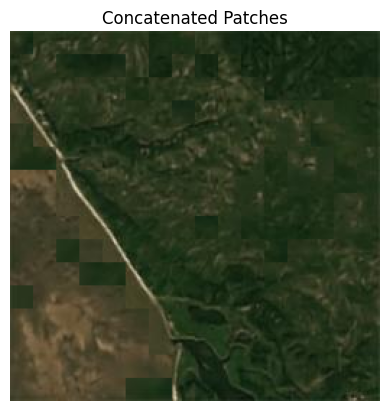

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of patches in a row and column
num_patches_per_row = 16
num_patches_per_column = 16

rows = []

for i in range(num_patches_per_column):
    # Extract the patches for the current row
    row_patches = patch_select[i * num_patches_per_row : (i + 1) * num_patches_per_row]

    # Concatenate the patches horizontally to form a row
    concatenated_row = np.concatenate(row_patches, axis=1)
    rows.append(concatenated_row)

final_image = np.concatenate(rows, axis=0)

image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

cv2.imwrite("/content/concat.png",image_rgb)

plt.imshow(final_image)
plt.title("Concatenated Patches")
plt.axis('off')  # Hide axis ticks for clarity
plt.show()

In [ ]:
dir_T0 = '/content/drive/MyDrive/AE/DiffPreds/T0'

image_filepaths = [os.path.join(dir_T0, filename) for filename in os.listdir(dir_T0)]

In [ ]:
image_filepaths[1]

'/content/drive/MyDrive/AE/DiffPreds/T0/T57WXN_R088_15.jpg'

## This is the cell/ function to get the SNR Patchwise blending algorithm to run on all images in the directories

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

dir_T0 = '/content/drive/MyDrive/AE/DiffPreds/T0'
dir_T1 = '/content/drive/MyDrive/AE/DiffPreds/T1'
dir_T2 = '/content/drive/MyDrive/AE/DiffPreds/T2'
dir_output = '/content/drive/MyDrive/AE/DiffPreds/Blended'

# Get the list of image filenames in dir_T0
image_filepaths0 = [os.path.join(dir_T0, filename) for filename in os.listdir(dir_T0)]
image_filepaths1 = [os.path.join(dir_T1, filename) for filename in os.listdir(dir_T1)]
image_filepaths2 = [os.path.join(dir_T2, filename) for filename in os.listdir(dir_T2)]
image_filenames = os.listdir(dir_T0)

for i in range(len(image_filepaths0)):
    image_paths = [image_filepaths0[i], image_filepaths1[i], image_filepaths2[i]]  # Adjust paths
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]

    # Define the patch size
    patch_size = 16

    # Function to split an image into patches
    def split_into_patches(image, patch_size):
        patches = []
        patch_positions = []  # Store the top-left corner of each patch
        for i in range(0, image.shape[0], patch_size):
            for j in range(0, image.shape[1], patch_size):
                patch = image[i:i + patch_size, j:j + patch_size]
                patches.append(patch)
                patch_positions.append((i, j))  # Store the top-left corner of each patch
        return patches, patch_positions

    # Function to calculate average SNR for a patch
    def calculate_average_snr(patch):
        snr_values = []

        # Calculate SNR for each RGB channel
        for idx in range(3):  # RGB has three channels
            channel_data = patch[:, :, idx]  # Extract the channel data
            mean_intensity = np.mean(channel_data)
            std_dev = np.std(channel_data)

            if std_dev == 0:  # Avoid division by zero
                snr = float('inf')  # Infinite SNR means no noise
            else:
                snr = mean_intensity / std_dev

            snr_values.append(snr)  # Collect SNR for each channel

        # Calculate the average SNR across all channels
        average_snr = np.mean(snr_values)
        return average_snr

    T0_patches, T0_patch_positions = split_into_patches(images[0], patch_size)
    T1_patches, T1_patch_positions = split_into_patches(images[1], patch_size)
    T2_patches, T2_patch_positions = split_into_patches(images[2], patch_size)
    # Calculate the average SNR for each patch
    T0_snr = [calculate_average_snr(patch) for patch in T0_patches]
    T1_snr = [calculate_average_snr(patch) for patch in T1_patches]
    T2_snr = [calculate_average_snr(patch) for patch in T2_patches]

    patch_select=[]
    count=0
    for x,y,z in zip(T0_snr,T1_snr,T2_snr):
      if x<y and x<z:
        patch_select.append(T0_patches[count])
        count+=1
      elif y<x and y<z:
        patch_select.append(T1_patches[count])
        count+=1
      else:
        patch_select.append(T2_patches[count])
        count+=1

    num_patches_per_row = 16
    num_patches_per_column = 16

    rows = []

    for i in range(num_patches_per_column):
        # Extract the patches for the current row
        row_patches = patch_select[i * num_patches_per_row : (i + 1) * num_patches_per_row]

        # Concatenate the patches horizontally to form a row
        concatenated_row = np.concatenate(row_patches, axis=1)
        rows.append(concatenated_row)

    final_image = np.concatenate(rows, axis=0)
    output_image_path = os.path.join(dir_output, image_filenames[i])
    cv2.imwrite(output_image_path, final_image)


KeyboardInterrupt: 

## Link to blended images for multiple time stamps: https://drive.google.com/drive/folders/1_St3Q-uBV3HIeUuiAa7blcKu9O6rER3U?usp=sharing

In [ ]:
# !rm -rf /content/drive/MyDrive/AE/DiffPreds/Blended

##The Blend

In [ ]:
import cv2
import numpy as np
import os

dir_T0 = '/content/drive/MyDrive/AE/DiffPreds/T0'
dir_T1 = '/content/drive/MyDrive/AE/DiffPreds/T1'
dir_T2 = '/content/drive/MyDrive/AE/DiffPreds/T2'
dir_output = '/content/drive/MyDrive/AE/DiffPreds/Blended'

image_filenames_T0 = set(os.listdir(dir_T0))

image_filename_blend = set(os.listdir(dir_output))

image_not_blend = list(image_filenames_T0 - image_filename_blend)

count = 0

for filename in image_not_blend:
    image_path_T0 = os.path.join(dir_T0, filename)
    image_path_T1 = os.path.join(dir_T1, filename)
    image_path_T2 = os.path.join(dir_T2, filename)

    # Check if the image files exist in all three directories
    if os.path.exists(image_path_T0) and os.path.exists(image_path_T1) and os.path.exists(image_path_T2):
        image_T0 = cv2.cvtColor(cv2.imread(image_path_T0), cv2.COLOR_BGR2RGB)
        image_T1 = cv2.cvtColor(cv2.imread(image_path_T1), cv2.COLOR_BGR2RGB)
        image_T2 = cv2.cvtColor(cv2.imread(image_path_T2), cv2.COLOR_BGR2RGB)
        # Define the patch size
        patch_size = 16

        # Function to split an image into patches
        def split_into_patches(image, patch_size):
            patches = []
            patch_positions = []  # Store the top-left corner of each patch
            for i in range(0, image.shape[0], patch_size):
                for j in range(0, image.shape[1], patch_size):
                    patch = image[i:i + patch_size, j:j + patch_size]
                    patches.append(patch)
                    patch_positions.append((i, j))  # Store the top-left corner of each patch
            return patches, patch_positions

        # Function to calculate average SNR for a patch
        def calculate_average_snr(patch):
            snr_values = []

            # Calculate SNR for each RGB channel
            for idx in range(3):  # RGB has three channels
                channel_data = patch[:, :, idx]  # Extract the channel data
                mean_intensity = np.mean(channel_data)
                std_dev = np.std(channel_data)

                if std_dev == 0:  # Avoid division by zero
                    snr = float('inf')  # Infinite SNR means no noise
                else:
                    snr = mean_intensity / std_dev

                snr_values.append(snr)  # Collect SNR for each channel

            # Calculate the average SNR across all channels
            average_snr = np.mean(snr_values)
            return average_snr

        T0_patches, T0_patch_positions = split_into_patches(image_T0, patch_size)
        T1_patches, T1_patch_positions = split_into_patches(image_T1, patch_size)
        T2_patches, T2_patch_positions = split_into_patches(image_T2, patch_size)

        # Calculate the average SNR for each patch
        T0_snr = [calculate_average_snr(patch) for patch in T0_patches]
        T1_snr = [calculate_average_snr(patch) for patch in T1_patches]
        T2_snr = [calculate_average_snr(patch) for patch in T2_patches]

        patch_select=[]
        count=0
        for x,y,z in zip(T0_snr,T1_snr,T2_snr):
            if x<y and x<z:
                patch_select.append(T0_patches[count])
            elif y<x and y<z:
                patch_select.append(T1_patches[count])
            else:
                patch_select.append(T2_patches[count])
            count+=1

        num_patches_per_row = 16
        num_patches_per_column = 16

        rows = []

        for i in range(num_patches_per_column):
            # Extract the patches for the current row
            row_patches = patch_select[i * num_patches_per_row : (i + 1) * num_patches_per_row]

            # Concatenate the patches horizontally to form a row
            concatenated_row = np.concatenate(row_patches, axis=1)
            rows.append(concatenated_row)

        final_image = np.concatenate(rows, axis=0)
        image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

        output_image_path = os.path.join(dir_output, filename)
        cv2.imwrite(output_image_path, image_rgb)
        count+=1

In [ ]:
dir_T0 = '/content/drive/MyDrive/AE/DiffPreds/T0'
dir_T1 = '/content/drive/MyDrive/AE/DiffPreds/T1'
dir_T2 = '/content/drive/MyDrive/AE/DiffPreds/T2'
dir_output = '/content/drive/MyDrive/AE/DiffPreds/Blended'

image_filenames_T0 = set(os.listdir(dir_T0))

image_filename_blend = set(os.listdir(dir_output))

image_not_blend = list(image_filenames_T0 - image_filename_blend)

In [ ]:
len(image_not_blend)

460

In [ ]:
dir_T0 = '/content/drive/MyDrive/AE/DiffPreds/T0'
dir_T1 = '/content/drive/MyDrive/AE/DiffPreds/T1'
dir_T2 = '/content/drive/MyDrive/AE/DiffPreds/T2'
dir_output = '/content/drive/MyDrive/AE/DiffPreds/Blended'

image_filenames_T0 = set(os.listdir(dir_T0))

image_filenames_blended = set(os.listdir(dir_output))

images_not_blended = list(image_filenames_T0 - image_filenames_blended)

count1=0
count2=0
count3=0
for filename in images_not_blended:
  image_path_T0 = os.path.join(dir_T0, filename)

  if os.path.exists(image_path_T0):
    count1 += 1
  if os.path.exists(image_path_T1):
    count2 += 1
  if os.path.exists(image_path_T2):
    count3 += 1

print(count1)
print(count2)
print(count3)

460
460
460


In [ ]:

import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/AE/DiffPreds/Blended/T25MBM_R009_22.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'clip'

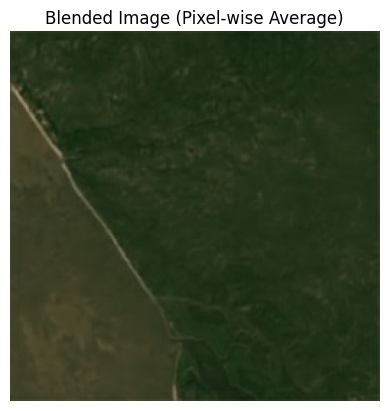

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in RGB format
image_paths = ['/content/drive/MyDrive/AE/DiffPreds/T2/T09WWP_R071_20.jpg.jpg', '/content/drive/MyDrive/AE/DiffPreds/T1/T09WWP_R071_20.jpg.jpg', '/content/drive/MyDrive/AE/DiffPreds/T0/T09WWP_R071_20.jpg.jpg']  # Adjust paths
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]

# Ensure all images are the same size and shape
assert all(image.shape == images[0].shape for image in images), "All images must have the same shape"

# Blend images by pixel-wise average
blended_image = np.mean(images, axis=0).astype(np.uint8)  # Take the mean across the images and convert to uint8

# Display the blended image
plt.imshow(blended_image)
plt.title("Blended Image (Pixel-wise Average)")
plt.axis('off')  # Hide axis ticks for clarity
plt.show()


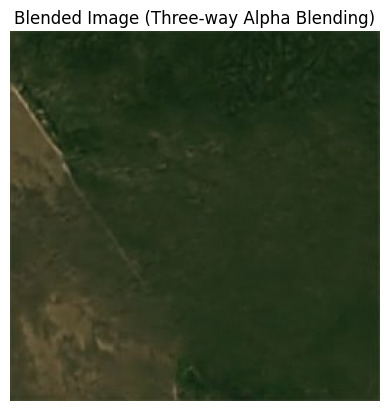

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load three images in RGB format
image_path1 = '/content/drive/MyDrive/AE/DiffPreds/T1/T09WWP_R071_20.jpg'  # Replace with your image path
image_path2 = '/content/drive/MyDrive/AE/DiffPreds/T2/T09WWP_R071_20.jpg'  # Replace with your image path
image_path3 = '/content/drive/MyDrive/AE/DiffPreds/T0/T09WWP_R071_20.jpg'  # Replace with your image path

image1 = cv2.cvtColor(cv2.imread(image_path1), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread(image_path2), cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(cv2.imread(image_path3), cv2.COLOR_BGR2RGB)

# Ensure all images are the same size
if image1.shape != image2.shape or image2.shape != image3.shape:
    raise ValueError("All images must have the same dimensions")

# Alpha blending between image1 and image2
alpha1 = 0.1  # Adjust for desired blend between image1 and image2
blended_image1 = cv2.addWeighted(image1, alpha1, image2, 1 - alpha1, 0)

# Alpha blending between blended_image1 and image3
alpha2 = 0.3  # Adjust for desired blend between the first blend and image3
final_blended_image = cv2.addWeighted(blended_image1, alpha2, image3, 1 - alpha2, 0)

# Display the final blended image
plt.imshow(final_blended_image)
plt.axis('off')
plt.title("Blended Image (Three-way Alpha Blending)")
plt.show()


In [ ]:
import os

# Path to the folder
folder_path = "/content/drive/MyDrive/AE/DiffPreds/Blended"

# List all items in the folder
all_items = os.listdir(folder_path)

# Filter out only files (excluding directories)
files = [item for item in all_items if os.path.isfile(os.path.join(folder_path, item))]

# Count the number of files
number_of_files = len(files)

print("Number of files in the folder:", number_of_files)

Number of files in the folder: 2957


In [ ]:
,